## **ANALYSE EN COMPOSANTES PRINCIPALES:**

**l'objectif :**

L'Analyse en Composantes Principales (ACP), ou Principal Component Analysis (PCA), est une méthode statistique utilisée pour simplifier la complexité des données en réduisant le nombre de variables d'une base de données. En mettant en lumière les corrélations entre les données, l'ACP permet de mieux comprendre les relations entre les différentes variables quantitatives. Dans notre base de données, nous devons vérifier le degré de dépendance entre les coordonnées d'un étudiant universitaire pour mieux comprendre la nature de l'influence de ces variables sur le parcours et les visions futures de l'étudiant


**Création d'environnement de travail :**

In [53]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
# permet d'afficher les graphiques dans un notebook
%matplotlib inline

**Importation de base de données :**

In [54]:
df = pandas.read_csv("STUDENT ATTITUDE AND BEHAVIOR .csv")
df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree (percentage%),social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,160,Morning,40000,No,50,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,300,Morning,15000,Yes,75,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,115,Anytime,13000,Yes,50,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,120,Anytime,1500000,No,50,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,130,Morning,50000,Yes,25,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,120,Morning,7000,Yes,50,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,160,Anytime,25000,Yes,75,0.5-1 hour,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,173,Night,20000,Yes,50,0.5-1 hour,150- 180 minutes,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,180,Anytime,20000,Yes,75,More than 2 hour,150- 180 minutes,Awful,good,No


**suppression des variables qualitatives :**

In [55]:
# Supprimer les colonnes avec les indices 0 et 1
indices_a_supprimer = [0,1,2,8,10,12,16,17,18]
df = df.drop(df.columns[indices_a_supprimer], axis=1)

# Afficher le DataFrame après la suppression des colonnes
print(df)

     Height(CM)  Weight(KG)  10th Mark  12th Mark  college mark  \
0         100.0        58.0       79.0       64.0          80.0   
1          90.0        40.0       70.0       80.0          70.0   
2         159.0        78.0       71.0       61.0          55.0   
3         147.0        20.0       70.0       59.0          58.0   
4         170.0        54.0       40.0       65.0          30.0   
..          ...         ...        ...        ...           ...   
230       170.0        76.0       72.0       67.0          65.0   
231       172.0        52.0       72.0       70.0          76.0   
232       139.0        33.0       90.0       75.0          70.0   
233       153.0        58.0       85.0       74.0          75.0   
234       155.0        39.0       45.0       45.0          50.0   

     daily studing time  salary expectation  \
0                   160               40000   
1                   300               15000   
2                   115               13000   
3      

**Prétraitement de données :**

In [ ]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Utilisez la méthode shape pour obtenir les dimensions du DataFrame
dimensions = df.shape

# La première valeur du tuple représentant les dimensions est le nombre de lignes
# La deuxième valeur est le nombre de colonnes
nombre_de_lignes = dimensions[0]
nombre_de_colonnes = dimensions[1]

# Vérifiez si toutes les colonnes ont le même nombre de lignes
toutes_de_meme_longueur = all(df[colonne].shape[0] == nombre_de_lignes for colonne in df.columns)

# Affichez le résultat
if toutes_de_meme_longueur:
    print("Toutes les colonnes ont la même longueur.")
else:
    print("Les colonnes n'ont pas la même longueur.")

In [56]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# Fonction pour convertir les intervalles en valeurs numériques
def convert_interval_to_float(interval):
    if isinstance(interval, str):
        interval = ' '.join(interval.lower().split())
        if 'more than' in interval:
            match = re.search(r'more than (\d+)', interval)
            if match:
                return float(match.group(1))
            else:
                return np.nan
        interval = interval.replace('hours', '').replace('hour', '').replace('minutes', '').replace('minute', '').replace(' ', '')
        if '-' in interval:
            parts = interval.split('-')
            try:
                start, end = map(float, parts)
                center = (start + end) / 2
            except ValueError:
                center = None
        else:
            try:
                center = float(interval)
            except ValueError:
                center = None
    else:
        center = interval
    return center


In [57]:
# Appliquer la fonction à une colonne spécifique de votre DataFrame
nom_colonne1 = 'social medai & video'
nom_colonne2 = 'Travelling Time '

# Vérifiez l'existence des colonnes avant d'appliquer la fonction
if nom_colonne1 in df.columns:
    df[nom_colonne1] = df[nom_colonne1].apply(convert_interval_to_float)
else:
    print(f"La colonne '{nom_colonne1}' n'existe pas dans le DataFrame.")

if nom_colonne2 in df.columns:
    df[nom_colonne2] = df[nom_colonne2].apply(convert_interval_to_float)
else:
    print(f"La colonne '{nom_colonne2}' n'existe pas dans le DataFrame.")

# Vérifiez les résultats
print(df)

     Height(CM)  Weight(KG)  10th Mark  12th Mark  college mark  \
0         100.0        58.0       79.0       64.0          80.0   
1          90.0        40.0       70.0       80.0          70.0   
2         159.0        78.0       71.0       61.0          55.0   
3         147.0        20.0       70.0       59.0          58.0   
4         170.0        54.0       40.0       65.0          30.0   
..          ...         ...        ...        ...           ...   
230       170.0        76.0       72.0       67.0          65.0   
231       172.0        52.0       72.0       70.0          76.0   
232       139.0        33.0       90.0       75.0          70.0   
233       153.0        58.0       85.0       74.0          75.0   
234       155.0        39.0       45.0       45.0          50.0   

     daily studing time  salary expectation  \
0                   160               40000   
1                   300               15000   
2                   115               13000   
3      

In [58]:
# Imputation des valeurs manquantes par la moyenne des colonnes
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Vérifiez si toutes les colonnes contiennent des NaN
if df.isnull().all().any():
    raise ValueError("Toutes les colonnes contiennent des valeurs manquantes.")

# Créez un objet imputer pour remplacer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')

# Appliquez l'imputation aux données
df_imputed = pd.DataFrame(imputer.fit_transform(df))

# Assurez-vous de restaurer les noms de colonnes et les index
df_imputed.columns = df.columns
df_imputed.index = df.index



**La normalisation des données:**

In [59]:
# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_imputed)

**L'application d'ACP:**

In [60]:
# Application de l'ACP
pca = PCA(n_components=2)
pca.fit(data_normalized)

PCA(n_components=2)

**Projection des données et résumé de la variance expliquée par ACP :**

In [61]:
# Projection des données sur les deux premières dimensions
data_projected = pca.transform(data_normalized)


In [62]:
# Création du DataFrame pour les données projetées
df_projected = pd.DataFrame(data_projected, columns=['Dimension 1', 'Dimension 2'])
# Création du DataFrame eig pour résumer les résultats
eig = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))],
    "Variance expliquée": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})

# Afficher le DataFrame eig
print(eig)

  Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            2.651869                 26.41                  26.41
1      Dim2            1.391331                 13.85                  40.26


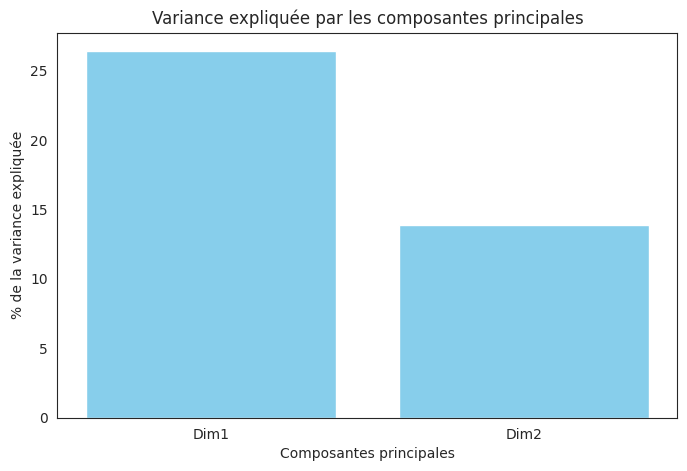

In [63]:
# Visualiser la variance expliquée
plt.figure(figsize=(8, 5))
plt.bar(eig['Dimension'], eig['% variance expliquée'], color='skyblue')
plt.ylabel('% de la variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Variance expliquée par les composantes principales')
plt.show()

**La visualisation des données en fonction des composantes principales :**

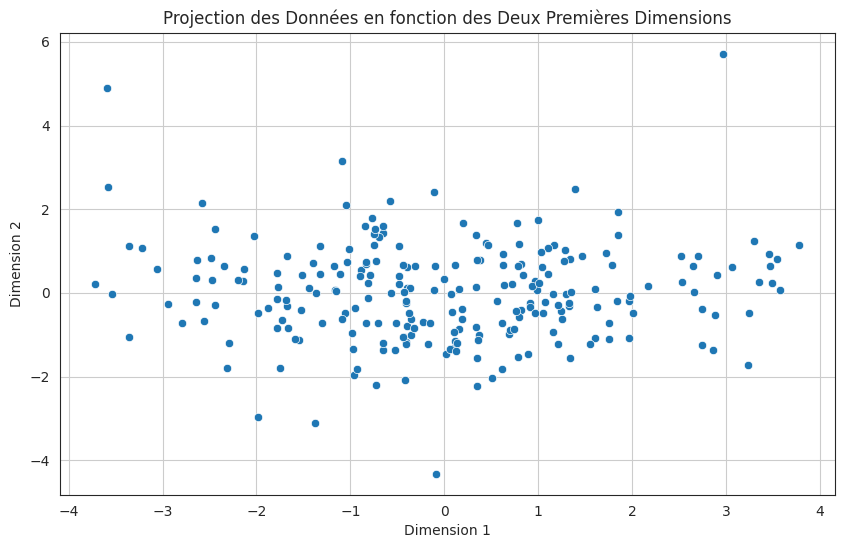

In [64]:
# Affichage des données projetées en fonction des deux dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_projected)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Projection des Données en fonction des Deux Premières Dimensions')
plt.grid()
plt.show()

**interpertation :**

la représentation des données en fonction des deux premières composantes principales se fait comme suit : la première composante principale explique 26,41 % de la variance totale, tandis que la deuxième composante principale en explique 13,85 %. Cela signifie que les données présentent une plus grande variabilité selon la première composante principale par rapport à la deuxième. De plus, la répartition des données est presque symétrique par rapport à l'origine (0,0), indiquant une distribution équilibrée des données autour de ce point central.


**Trace de cercle de corrélation :**

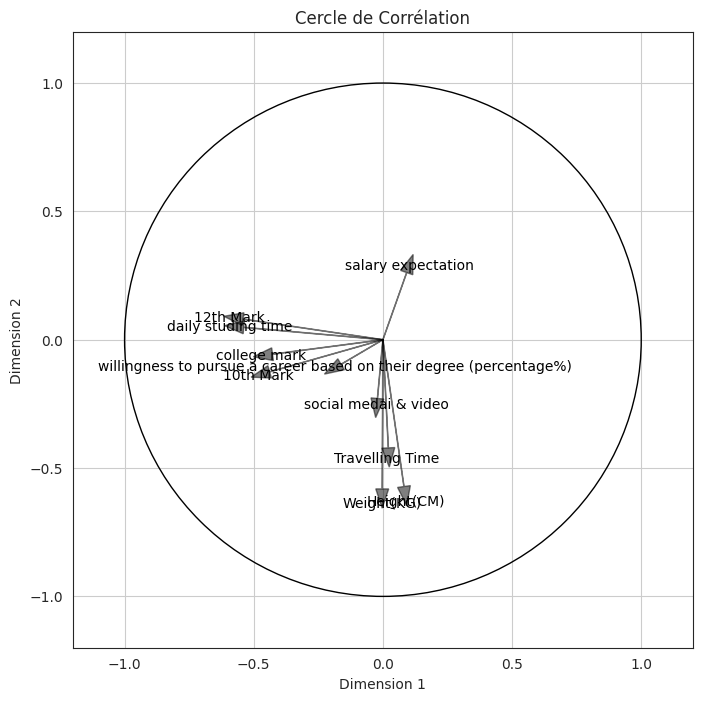

In [65]:
# Fonction pour tracer le cercle de corrélation
def plot_correlation_circle(pca, labels=None):
    plt.figure(figsize=(8, 8))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    for i, (var, comp) in enumerate(zip(labels, pca.components_.T)):
        plt.arrow(0, 0, comp[0], comp[1], color='black', alpha=0.5, head_width=0.05)
        plt.text(comp[0] * 1.1, comp[1] * 1.1, var, color='black', ha='center', va='center')
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Cercle de Corrélation")
    plt.grid(True)
    plt.show()

# Afficher le cercle de corrélation
plot_correlation_circle(pca, labels=df.columns)

**Interpretation :**

Le cercle de corrélation montre des facteurs pour visualiser l'influence des variables sur les deux composantes principales : la direction et la longueur des flèches, ainsi que leur angle avec l'axe de Dimension 1 et Dimension 2 .

 -la Note au collège 'college mark' et Note de terminale '12th mark' sont fortement corrélées (positivement) et contribuent fortement à la première composante principale. Cela suggère que les résultats au lycée sont un bon indicateur des résultats à l'université.

-Temps d'étude quotidien 'daily student time' est modérément corrélé (positivement) avec la première composante principale, et faiblement corrélé avec la deuxième composante principale. Cela suggère que les étudiants qui étudient plus ont tendance à avoir de meilleures notes, mais ce n'est pas le facteur le plus important.

-Attentes salariales  'Salary expectation'sont modérément corrélées (positivement) avec la première composante principale, mais faiblement corrélées avec la deuxième composante principale. Cela suggère que les étudiants ayant des notes plus élevées ont tendance à avoir des attentes salariales plus élevées, mais d'autres facteurs jouent probablement un rôle plus important.

-Volonté de poursuivre une carrière basée sur le diplôme 'willingness to pursue a career based on their degree'et Utilisation des réseaux sociaux et des jeux vidéo 'social medai & video' sont tous deux modérément corrélés (positivement) avec la deuxième composante principale, mais faiblement corrélés avec la première composante principale. Cela suggère que ces deux variables sont liées l'une à l'autre, mais pas fortement liées aux notes ou aux attentes salariales.

-Temps de trajet 'Travelling Time' est faiblement corrélé avec les deux composantes principales. Cela suggère que le temps de trajet n'a pas de relation forte avec aucune des autres variables étudiées.